In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# Load sales data
sales_df = pd.read_csv('sales_data.csv')
# Load product information
products_df = pd.read_csv('product_info.csv')
# Load customer information
customers_df = pd.read_csv('customer_info.csv')

In [5]:
# View first 5 rows of each dataset
print("Sales Data:")
print(sales_df.head())

print("\nProduct Data:")
print(products_df.head())

print("\nCustomer Data:")
print(customers_df.head())

# Check shape and column info for each
print("\nSales Data Info:")
print(sales_df.info())

print("\nProduct Data Info:")
print(products_df.info())

print("\nCustomer Data Info:")
print(customers_df.info())

Sales Data:
  order_id customer_id product_id quantity  unit_price order_date  \
0  O966977      C00397      P0022        3       39.25   06-07-25   
1  O696648      C00236      P0023        5       18.92   06-07-25   
2  O202644      C00492      P0011        1       29.68   06-07-25   
3  O501803      C00031      P0003        1       32.76   06-07-25   
4  O322242      C00495      P0016        1       47.62   06-07-25   

  delivery_status payment_method   region  discount_applied  
0       Delivered         PayPal  Central              0.00  
1         DELAYED    credit card    North              0.00  
2       delivered  Bank Transfer    North              0.15  
3      Cancelled     Credit Card  Central              0.20  
4         DELAYED    Credit Card     West              0.20  

Product Data:
  product_id             product_name       category launch_date  base_price  \
0      P0001       Storage Product 39        Storage    11-03-25       15.88   
1      P0002      Cleaning

In [16]:
# Standardise text columns
sales_df['delivery_status'] = sales_df['delivery_status'].str.strip().str.title()
sales_df['payment_method'] = sales_df['payment_method'].str.strip().str.title()
sales_df['region'] = sales_df['region'].str.strip().str.title()

In [17]:
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'], errors='coerce', dayfirst=False)

In [8]:
print(sales_df.isnull().sum())

order_id              1
customer_id           2
product_id            5
quantity              3
unit_price            1
order_date            3
delivery_status       3
payment_method        3
region                0
discount_applied    517
dtype: int64


In [18]:
# Fill missing categorical fields
sales_df['delivery_status'] = sales_df['delivery_status'].fillna('Unknown')
sales_df['payment_method'] = sales_df['payment_method'].fillna('Unknown')
sales_df['region'] = sales_df['region'].fillna('Unknown')

# Fill missing numeric fields
sales_df['discount_applied'] = sales_df['discount_applied'].fillna(0.0)

# Drop rows where essential fields are missing
sales_df = sales_df.dropna(subset=['order_id', 'customer_id', 'product_id', 'quantity', 'unit_price', 'order_date'])


In [19]:
# Drop duplicate orders based on order_id
sales_df = sales_df.drop_duplicates(subset='order_id')

In [21]:
# Convert columns to numeric, coerce errors to NaN
sales_df['quantity'] = pd.to_numeric(sales_df['quantity'], errors='coerce')
sales_df['unit_price'] = pd.to_numeric(sales_df['unit_price'], errors='coerce')
sales_df['discount_applied'] = pd.to_numeric(sales_df['discount_applied'], errors='coerce')

# Drop rows where conversion failed (NaN)
sales_df = sales_df.dropna(subset=['quantity', 'unit_price', 'discount_applied'])

In [22]:
sales_df = sales_df[
    (sales_df['quantity'] >= 0) &
    (sales_df['unit_price'] >= 0) &
    (sales_df['discount_applied'] >= 0)
]

In [23]:
# Quick check for any remaining nulls or issues
print(sales_df.isnull().sum())

order_id            0
customer_id         0
product_id          0
quantity            0
unit_price          0
order_date          0
delivery_status     0
payment_method      0
region              0
discount_applied    0
dtype: int64


In [24]:
# Preview first 20 rows
print("Cleaned Sales Data:")
print(sales_df.head(20))

Cleaned Sales Data:
   order_id customer_id product_id  quantity  unit_price order_date  \
0   O966977      C00397      P0022       3.0       39.25 2025-06-07   
1   O696648      C00236      P0023       5.0       18.92 2025-06-07   
2   O202644      C00492      P0011       1.0       29.68 2025-06-07   
3   O501803      C00031      P0003       1.0       32.76 2025-06-07   
4   O322242      C00495      P0016       1.0       47.62 2025-06-07   
5   O190175      C00388      P0005       3.0       37.89 2025-06-07   
6   O272646      C00328      P0027       5.0       30.83 2025-06-07   
7   O411881      C00201      P0019       3.0       12.56 2025-06-07   
8   O170570      C00076      P0030       3.0       28.32 2025-06-07   
9   O619944      C00330      P0002       1.0       30.96 2025-06-07   
10  O490023      C00285      P0022       2.0        9.98 2025-06-07   
11  O865247      C00249      P0022       5.0       30.92 2025-06-07   
12  O315552      C00110      P0007       4.0       28.74 

In [25]:
print("\nProduct Data:")
print(products_df.head(20))


Product Data:
   product_id              product_name       category launch_date  \
0       P0001        Storage Product 39        Storage    11-03-25   
1       P0002       Cleaning Product 82       Cleaning    18-08-24   
2       P0003       Cleaning Product 85       Cleaning    15-07-24   
3       P0004        Kitchen Product 82        Kitchen    19-04-25   
4       P0005   Personal Care Product 1  Personal Care    20-10-24   
5       P0006       Cleaning Product 16       Cleaning    09-10-24   
6       P0007  Personal Care Product 64  Personal Care    30-09-24   
7       P0008        Storage Product 47        Storage    29-08-24   
8       P0009       Outdoors Product 13       Outdoors    18-04-25   
9       P0010       Cleaning Product 70       Cleaning    14-08-24   
10      P0011        Kitchen Product 53        Kitchen    25-03-25   
11      P0012       Cleaning Product 29       Cleaning    19-04-25   
12      P0013       Cleaning Product 94       Cleaning    17-06-25   
13   

In [ ]:
# Standardize text columns
products_df['product_name'] = products_df['product_name'].str.strip().str.title()
products_df['category'] = products_df['category'].str.strip().str.title()
products_df['supplier_code'] = products_df['supplier_code'].str.strip().str.upper()

# Convert launch_date to datetime
products_df['launch_date'] = pd.to_datetime(products_df['launch_date'], errors='coerce', dayfirst=True)

# Quick check for missing values
print(products_df.isnull().sum())

product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64


/var/folders/31/vqxx2fgx1wv6bzyzgc3tf9zr0000gn/T/ipykernel_14489/1963694586.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  products_df['launch_date'] = pd.to_datetime(products_df['launch_date'], errors='coerce', dayfirst=True)


In [27]:
products_df['launch_date'] = pd.to_datetime(
    products_df['launch_date'], 
    errors='coerce',      # invalid dates become NaT
    dayfirst=True         # your sample looks like DD-MM-YY
)
# Check for any dates that failed to parse
print("Missing launch dates after conversion:")
print(products_df['launch_date'].isnull().sum())

Missing launch dates after conversion:
0


In [28]:
# Fill any missing numeric values (base_price) with 0.0 if needed
products_df['base_price'] = products_df['base_price'].fillna(0.0)

In [29]:
products_df = products_df.drop_duplicates(subset='product_id')

In [30]:
products_df = products_df[products_df['base_price'] >= 0]

In [31]:
print("Products Data:")
print(products_df.head(20))
print("\nMissing values summary:")
print(products_df.isnull().sum())

Products Data:
   product_id              product_name       category launch_date  \
0       P0001        Storage Product 39        Storage  2025-03-11   
1       P0002       Cleaning Product 82       Cleaning  2024-08-18   
2       P0003       Cleaning Product 85       Cleaning  2024-07-15   
3       P0004        Kitchen Product 82        Kitchen  2025-04-19   
4       P0005   Personal Care Product 1  Personal Care  2024-10-20   
5       P0006       Cleaning Product 16       Cleaning  2024-10-09   
6       P0007  Personal Care Product 64  Personal Care  2024-09-30   
7       P0008        Storage Product 47        Storage  2024-08-29   
8       P0009       Outdoors Product 13       Outdoors  2025-04-18   
9       P0010       Cleaning Product 70       Cleaning  2024-08-14   
10      P0011        Kitchen Product 53        Kitchen  2025-03-25   
11      P0012       Cleaning Product 29       Cleaning  2025-04-19   
12      P0013       Cleaning Product 94       Cleaning  2025-06-17   
13   

In [32]:
print("\nCustomer Data:")
print(customers_df.head(20))


Customer Data:
   customer_id                         email signup_date  gender   region  \
0       C00001        shaneramirez@gmail.com    26-04-25    Male  Central   
1       C00002         jpeterson@bernard.com    11-08-24  Female  Central   
2       C00003       howardmaurice@yahoo.com    15-05-25    male  Central   
3       C00004           yherrera@arnold.org    14-06-25  FEMALE  Central   
4       C00005       janetwilliams@gmail.com    02-05-25    Male     West   
5       C00006       wyattmichelle@yahoo.com    21-10-24    male  Central   
6       C00007       francisco53@hotmail.com    17-10-24  FEMALE    North   
7       C00008   amandasanchez@gray-mayo.net    29-09-24    male  Central   
8       C00009        perezantonio@yahoo.com    08-12-24  FEMALE    South   
9       C00010       clarksherri@hotmail.com    05-11-24    male     East   
10      C00011     pfoster@thomas-taylor.net    31-01-25   Other     East   
11      C00012              zhurst@yahoo.com    29-09-24   f

In [34]:
# Convert signup_date to datetime
customers_df['signup_date'] = pd.to_datetime(customers_df['signup_date'], errors='coerce', dayfirst=True)

In [35]:
customers_df.isnull().sum()

customer_id     3
email           6
signup_date     4
gender          4
region          3
loyalty_tier    2
dtype: int64

In [37]:
# Drop rows where customer_id is missing (essential identifier)
customers_df = customers_df.dropna(subset=['customer_id'])

# Fill missing emails with a placeholder
customers_df['email'] = customers_df['email'].fillna('no_email@unknown.com')

# Fill missing signup_date with a placeholder date
customers_df['signup_date'] = customers_df['signup_date'].fillna('2024-01-01')

# Fill missing gender with 'Other'
customers_df['gender'] = customers_df['gender'].fillna('Other')

# Fill missing region with 'Unknown'
customers_df['region'] = customers_df['region'].fillna('Unknown')

# Fill missing loyalty_tier with 'BRONZE'
customers_df['loyalty_tier'] = customers_df['loyalty_tier'].fillna('BRONZE')

In [41]:
customers_df['gender'] = customers_df['gender'].replace({'Femle': 'Female'})
customers_df['loyalty_tier'] = customers_df['loyalty_tier'].replace({'GLD': 'GOLD'})
customers_df['region'] = customers_df['region'].str.title()

In [38]:
# Standardize signup_date to datetime
customers_df['signup_date'] = pd.to_datetime(customers_df['signup_date'], errors='coerce', dayfirst=True)

# Standardize gender to title case (Male, Female, Other)
customers_df['gender'] = customers_df['gender'].str.title()

# Standardize loyalty_tier to uppercase
customers_df['loyalty_tier'] = customers_df['loyalty_tier'].str.upper()

# Optional: trim extra spaces in region and email
customers_df['region'] = customers_df['region'].str.strip()
customers_df['email'] = customers_df['email'].str.strip()


In [39]:
# Check missing values after cleaning
print(customers_df.isna().sum())

customer_id     0
email           0
signup_date     0
gender          0
region          0
loyalty_tier    0
dtype: int64


In [42]:
# Quick look at cleaned data
customers_df.head(20)

,customer_id,email,signup_date,gender,region,loyalty_tier
0,C00001,shaneramirez@gmail.com,2025-04-26,Male,Central,SILVER
1,C00002,jpeterson@bernard.com,2024-08-11,Female,Central,GOLD
2,C00003,howardmaurice@yahoo.com,2025-05-15,Male,Central,GOLD
3,C00004,yherrera@arnold.org,2025-06-14,Female,Central,GOLD
4,C00005,janetwilliams@gmail.com,2025-05-02,Male,West,BRONZE
5,C00006,wyattmichelle@yahoo.com,2024-10-21,Male,Central,BRONZE
6,C00007,francisco53@hotmail.com,2024-10-17,Female,North,GOLD
7,C00008,amandasanchez@gray-mayo.net,2024-09-29,Male,Central,GOLD
8,C00009,perezantonio@yahoo.com,2024-12-08,Female,South,SILVER
9,C00010,clarksherri@hotmail.com,2024-11-05,Male,East,GOLD


In [44]:
# Task 3: Merge the Data

# Step 1: Merge sales_data with product_info on product_id
merged_df = sales_df.merge(products_df, on='product_id', how='left')

# Step 2: Merge the result with customer_info on customer_id
merged_df = merged_df.merge(customers_df, on='customer_id', how='left')

# Step 3: Inspect the merged dataframe
print(merged_df.info())
print(merged_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2981 non-null   object        
 1   customer_id       2981 non-null   object        
 2   product_id        2981 non-null   object        
 3   quantity          2981 non-null   float64       
 4   unit_price        2981 non-null   float64       
 5   order_date        2981 non-null   datetime64[ns]
 6   delivery_status   2981 non-null   object        
 7   payment_method    2981 non-null   object        
 8   region_x          2981 non-null   object        
 9   discount_applied  2981 non-null   float64       
 10  product_name      2981 non-null   object        
 11  category          2981 non-null   object        
 12  launch_date       2981 non-null   datetime64[ns]
 13  base_price        2981 non-null   float64       
 14  supplier_code     2981 n

In [45]:
# Task 4

In [ ]:
merged_df['revenue'] = merged_df['quantity'] * merged_df['unit_price'] * (1 - merged_df['discount_applied'])
merged_df['order_week'] = merged_df['order_date'].dt.isocalendar().week

In [47]:
bins = [0, 15, 30, float('inf')]
labels = ['Low', 'Medium', 'High']
merged_df['price_band'] = pd.cut(merged_df['unit_price'], bins=bins, labels=labels, right=False)

In [48]:
merged_df['days_to_order'] = (merged_df['order_date'] - merged_df['launch_date']).dt.days

In [49]:
merged_df['email_domain'] = merged_df['email'].apply(lambda x: x.split('@')[1] if pd.notnull(x) else None)

In [50]:
merged_df['is_late'] = merged_df['delivery_status'].apply(lambda x: True if x == 'Delayed' else False)

In [55]:
merged_df[['revenue', 'order_week', 'price_band', 'days_to_order', 'email_domain', 'is_late']].head(20)

,revenue,order_week,price_band,days_to_order,email_domain,is_late
0,117.7500,23,High,246,mills-logan.com,False
1,94.6000,23,Medium,140,morgan.com,True
2,25.2280,23,Medium,74,walters-smith.com,False
3,26.2080,23,High,327,gmail.com,False
4,38.0960,23,High,107,hotmail.com,True
5,102.3030,23,High,230,yahoo.com,True
6,146.4425,23,High,259,moore.com,False
7,37.6800,23,Low,325,whitehead-hernandez.biz,False
8,72.2160,23,Medium,64,herring.com,False
9,26.3160,23,High,293,russell.com,True


In [ ]:
# Task 5

In [53]:
# Group by region and week, then sum revenue
weekly_revenue = merged_df.groupby(['region_x', 'order_week'])['revenue'].sum().reset_index()
weekly_revenue.head()

,region_x,order_week,revenue
0,Central,23,47143.2815
1,East,23,47799.4580
2,North,23,46758.9775
3,Nrth,23,19.5120
4,South,23,49560.5725


In [56]:
# Aggregate by product category
category_perf = merged_df.groupby('category').agg(
    total_revenue=('revenue', 'sum'),
    total_quantity=('quantity', 'sum'),
    avg_discount=('discount_applied', 'mean')
).reset_index()
category_perf

,category,total_revenue,total_quantity,avg_discount
0,Cleaning,93235.5295,3573.0,0.085643
1,Kitchen,33933.6760,1226.0,0.075622
2,Outdoors,40018.6840,1515.0,0.081881
3,Personal Care,24892.2765,900.0,0.087043
4,Storage,46931.4575,1730.0,0.081043


In [57]:
# First, create signup_month from signup_date
merged_df['signup_month'] = merged_df['signup_date'].dt.month

# Group by loyalty_tier and signup_month
customer_behaviour = merged_df.groupby(['loyalty_tier', 'signup_month']).agg(
    total_orders=('order_id', 'count'),
    total_revenue=('revenue', 'sum'),
    avg_order_value=('revenue', 'mean')
).reset_index()
customer_behaviour

,loyalty_tier,signup_month,total_orders,total_revenue,avg_order_value
0,GOLD,1.0,72,6008.6100,83.452917
1,GOLD,2.0,55,4608.0730,83.783145
2,GOLD,3.0,42,2881.6535,68.610798
3,GOLD,4.0,18,958.1940,53.233000
4,GOLD,5.0,76,6356.8890,83.643276
5,GOLD,6.0,20,1933.6385,96.681925
6,GOLD,7.0,81,5872.3020,72.497556
7,GOLD,8.0,83,6422.2555,77.376572
8,GOLD,9.0,60,5079.8215,84.663692
9,GOLD,10.0,71,5219.0000,73.507042


In [59]:
# Count delayed vs on-time orders
delivery_perf = merged_df.groupby(['region_x', 'price_band']).agg(
    total_orders=('order_id', 'count'),
    delayed_orders=('is_late', 'sum')
).reset_index()

# Optionally, calculate % of late deliveries
delivery_perf['pct_delayed'] = delivery_perf['delayed_orders'] / delivery_perf['total_orders'] * 100
delivery_perf

/var/folders/31/vqxx2fgx1wv6bzyzgc3tf9zr0000gn/T/ipykernel_14489/866792742.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_perf = merged_df.groupby(['region_x', 'price_band']).agg(


,region_x,price_band,total_orders,delayed_orders,pct_delayed
0,Central,Low,112,43,38.392857
1,Central,Medium,225,88,39.111111
2,Central,High,262,104,39.694656
3,East,Low,95,39,41.052632
4,East,Medium,236,100,42.372881
5,East,High,266,109,40.977444
6,North,Low,107,41,38.317757
7,North,Medium,203,89,43.842365
8,North,High,293,106,36.177474
9,Nrth,Low,0,0,NaN


In [60]:
# Count payment methods per loyalty tier
payment_pref = merged_df.groupby(['loyalty_tier', 'payment_method']).size().reset_index(name='count')

# Optionally, pivot for easier reading
payment_pref_pivot = payment_pref.pivot(index='loyalty_tier', columns='payment_method', values='count').fillna(0)
payment_pref_pivot

payment_method,Bank Transfer,Bank Transfr,Credit Card,Paypal,Unknown
loyalty_tier,,,,,
GOLD,170.0,1.0,374.0,185.0,1.0
BRNZE,2.0,0.0,5.0,4.0,0.0
BRONZE,175.0,0.0,283.0,162.0,0.0
GOLD,232.0,0.0,464.0,241.0,1.0
SILVER,190.0,0.0,298.0,162.0,1.0
SLLVER,0.0,0.0,6.0,0.0,0.0


In [61]:
# Task 6

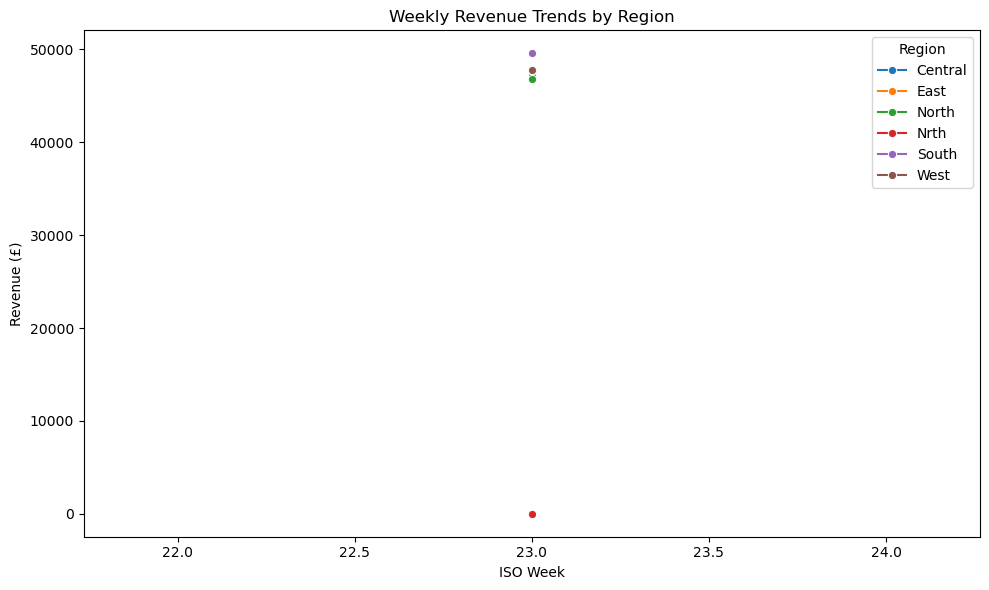

In [62]:
plt.figure(figsize=(10,6))
sns.lineplot(data=weekly_revenue, x='order_week', y='revenue', hue='region_x', marker='o')
plt.title('Weekly Revenue Trends by Region')
plt.xlabel('ISO Week')
plt.ylabel('Revenue (£)')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

/var/folders/31/vqxx2fgx1wv6bzyzgc3tf9zr0000gn/T/ipykernel_14489/1410464112.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_categories, x='category', y='total_revenue', palette='viridis')


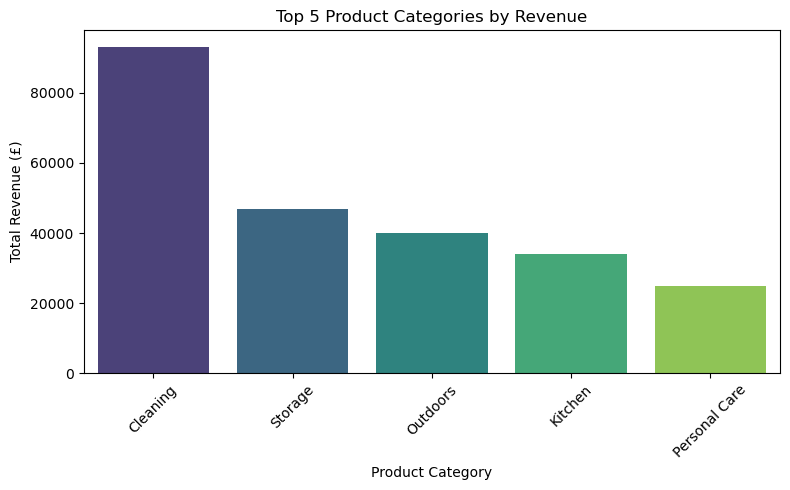

In [63]:
top5_categories = category_perf.sort_values('total_revenue', ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(data=top5_categories, x='category', y='total_revenue', palette='viridis')
plt.title('Top 5 Product Categories by Revenue')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


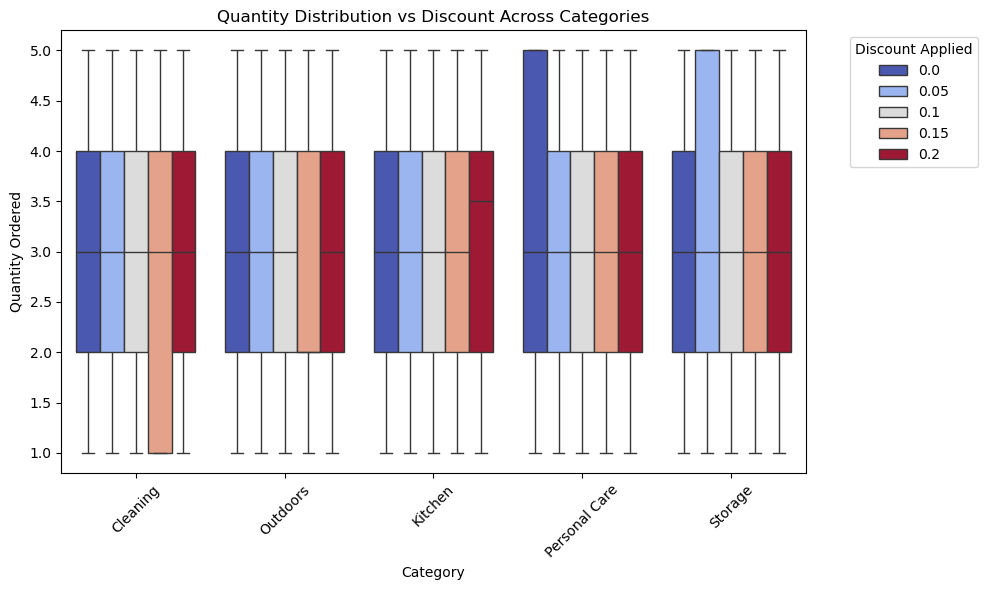

In [64]:
plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x='category', y='quantity', hue='discount_applied', palette='coolwarm')
plt.title('Quantity Distribution vs Discount Across Categories')
plt.xlabel('Category')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.legend(title='Discount Applied', bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()


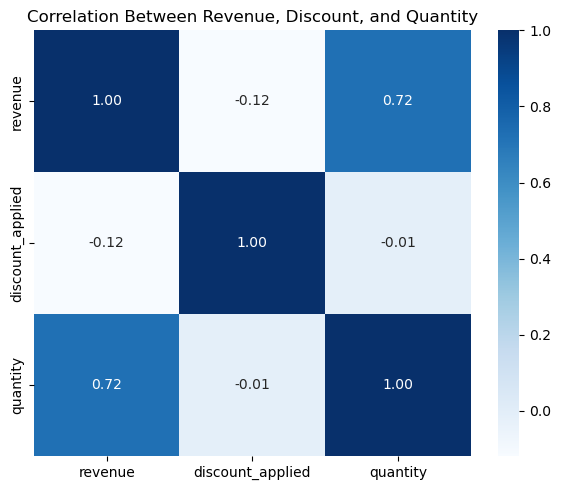

In [65]:
corr = merged_df[['revenue', 'discount_applied', 'quantity']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Between Revenue, Discount, and Quantity')
plt.tight_layout()
plt.show()


/var/folders/31/vqxx2fgx1wv6bzyzgc3tf9zr0000gn/T/ipykernel_14489/1987763596.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_price = merged_df.groupby(['price_band', 'delivery_status']).size().unstack(fill_value=0)


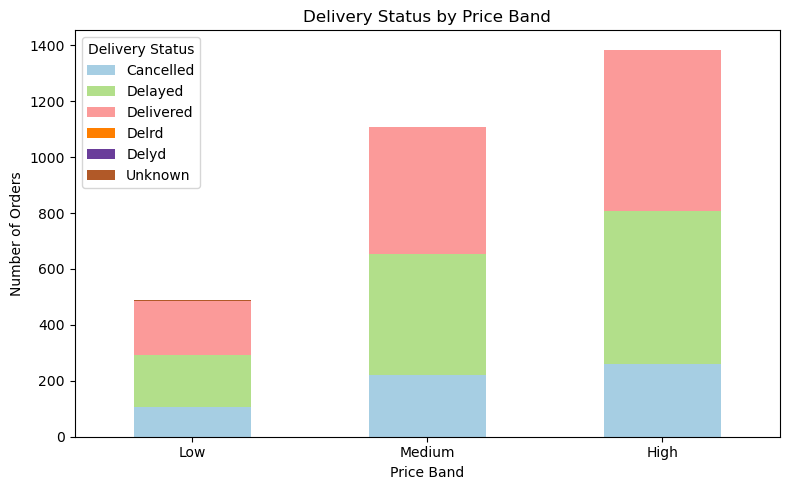

In [66]:
delivery_price = merged_df.groupby(['price_band', 'delivery_status']).size().unstack(fill_value=0)

delivery_price.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Paired')
plt.title('Delivery Status by Price Band')
plt.xlabel('Price Band')
plt.ylabel('Number of Orders')
plt.legend(title='Delivery Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
